# Explore here

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Añadí statsmodels a requirements para poder importar
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv")
data

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [7]:
#Establecer la salida como índice
data.set_index("date", inplace=True)

In [8]:
data

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


In [9]:
# Crear la serie temporal (ventas)
sales_ts = data["sales"]

In [10]:
data

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


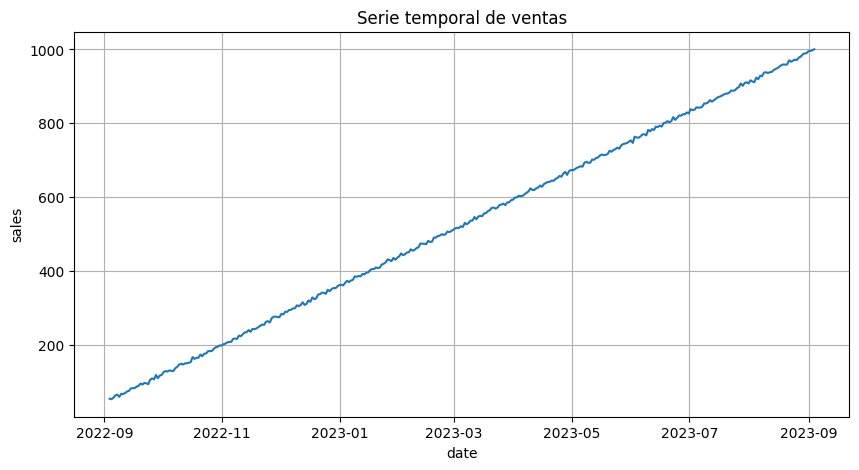

In [11]:
plt.figure(figsize=(10,5))
plt.plot(sales_ts)
plt.title("Serie temporal de ventas")
plt.xlabel("date")
plt.ylabel("sales")
plt.grid(True)
plt.show()

## Respuestas
##### 1.- El tensor de la serie temporal es diario 
##### 2.- La tendencia es alcista 
##### 3.- No es estacionaria
##### 4.- Si exsite ruido porque no es completamente recta

In [16]:
#Dividir train y test
train_size = int(len(sales_ts) * 0.8)
train = sales_ts[:train_size]
test = sales_ts[train_size:]

In [18]:
#Entrenamiento del modelo 
#se eligen los parametros despues de un analisis rapido
#donde si hay tendencia y no hay estacionalidad clara
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -838.546
Date:                Wed, 14 Jan 2026   AIC                           1683.093
Time:                        05:38:28   BIC                           1694.113
Sample:                    09-03-2022   HQIC                          1687.508
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    670.268      0.000       0.997       1.003
ma.L1         -0.9995      1.064     -0.939      0.348      -3.085       1.086
sigma2        18.3542     19.579      0.937      0.349     -20.021      56.729
===================================================================================
Ljung-Box (L1) (Q):                  83.14   Jarque-Bera (JB):                 2.74
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               1.07   Skew:                             0.24
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Predicción
predic = model_fit.forecast(steps=len(test))

In [20]:
#Evaluación del rendimiento
mae = mean_absolute_error(test, predic)
rmse = np.sqrt(mean_squared_error(test, predic))
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 3.2956379360398294
RMSE: 4.081205256775362


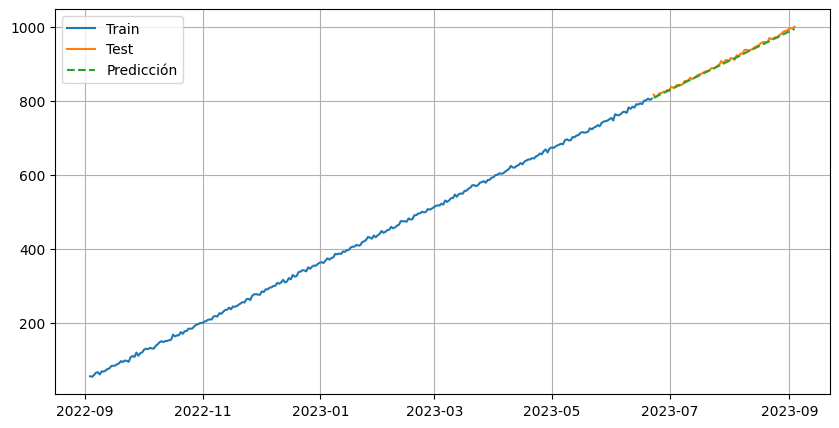

In [22]:

plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(predic, label="Predicción", linestyle="--")
plt.legend()
plt.grid(True)
plt.show()